In [1]:
import pandas as pd

In [5]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [14]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [26]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_train['customerid']
del df_val['churn']

In [27]:
len(df_train), len(df_val), len(df_test),

(3774, 1860, 1409)

In [28]:
y_train,  y_val

(array([0, 0, 0, ..., 1, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
dict_train = df_train.to_dict(orient='records')

In [35]:
dv = DictVectorizer()
dv.fit(dict_train)

DictVectorizer()

In [37]:
X_train = dv.transform(dict_train)

Train the model

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [55]:
df_val

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5805,male,1,yes,no,19,yes,no,dsl,yes,no,yes,no,yes,no,month-to-month,no,bank_transfer_(automatic),66.40,1286.05
3687,male,0,yes,yes,19,yes,no,fiber_optic,no,yes,no,yes,yes,yes,one_year,no,bank_transfer_(automatic),100.00,1888.65
6900,male,1,no,no,51,yes,no,fiber_optic,no,no,yes,no,yes,yes,one_year,yes,bank_transfer_(automatic),94.00,4905.75
1644,female,0,no,no,34,yes,yes,fiber_optic,yes,yes,yes,no,yes,yes,month-to-month,yes,mailed_check,109.80,3587.25
6975,female,0,yes,yes,24,yes,yes,dsl,yes,yes,yes,no,no,no,two_year,no,electronic_check,64.35,1558.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,female,0,no,no,2,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,electronic_check,19.90,57.40
5203,male,0,no,yes,3,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,no,mailed_check,70.70,225.65
1399,female,0,yes,yes,14,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,19.55,294.50
302,male,0,no,no,4,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,yes,electronic_check,90.40,356.65


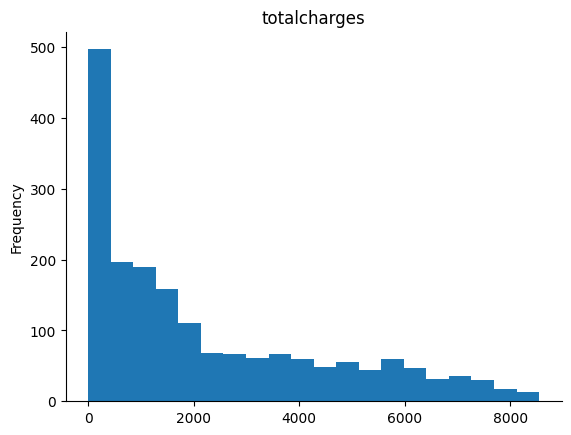

In [58]:
# @title totalcharges

from matplotlib import pyplot as plt
df_val['totalcharges'].plot(kind='hist', bins=20, title='totalcharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [62]:
dict_val = df_val.to_dict(orient='records')
X_val= dv.transform(dict_val)
y_pred = model.predict(X_val)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.8016129032258065

In [67]:
import pickle
with open('/content/drive/MyDrive/churn_pred/model.bin', 'wb') as f_out:
  pickle.dump((dv, model), f_out)

!ls -lh /content/drive/MyDrive/churn_pred

total 2.5K
-rw------- 1 root root 2.5K Mar 25 06:02 model.bin
